# Spam Email Detection with Machine Learning 

In this project we'll be working on creating a machine learning model that can detect spam emails. A spam email detector plays a crucial role in safeguarding users, businesses, and organizations from various online threats and nuisances addociated with unwanted emails. 

# Data 
> The original data came from: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data
>It contains a collection of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam. 

# Preparing the tools 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import re
from wordcloud import WordCloud

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load the data

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
print(f"Dataset shape: {df.shape}")
df

Dataset shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning 

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
# Display the data types of each column 
print(df.dtypes)

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object


In [7]:
# Column names 
print(f"Feature names : {df.columns.values}")

Feature names : ['v1' 'v2' 'Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4']


In [8]:
# Check for missing values 
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [9]:
# We are going to drop the last 3 columns since they don't have any information 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
v1    0
v2    0
dtype: int64


In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Check for duplicated values 
dup_values = df.duplicated().sum()
print(f"Duplicated values in each column:\n{dup_values}")

Duplicated values in each column:
403


In [12]:
# We are going to drop the duplicated values 
df = df.drop_duplicates(keep='first')

In [13]:
# Rename v1 and v2 columns for better understanding 
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### Encoding 
We want to change the `label` column to numerical values


In [14]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [15]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA 

#### Label Distribution

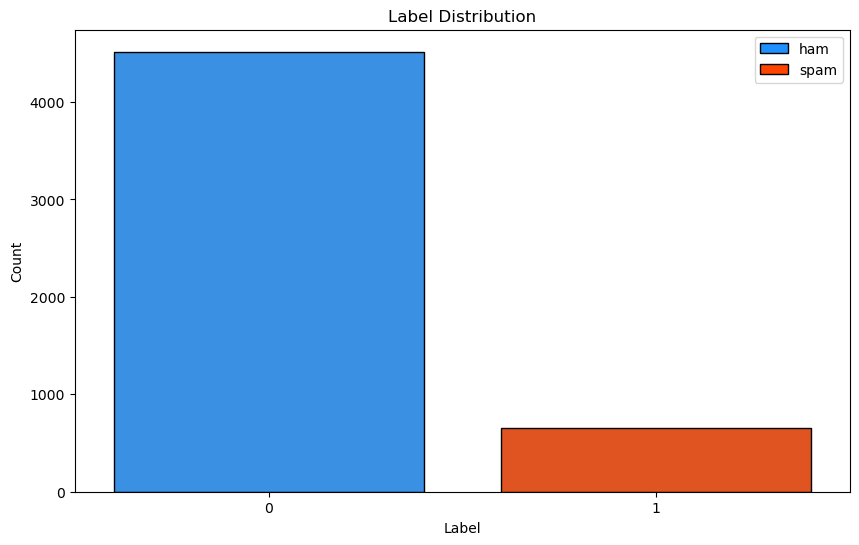

In [16]:
label_counts = df['label'].value_counts()

colors = ['dodgerblue', 'orangered']

plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors, edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(handles=[plt.Rectangle((0,0),1,1,fc=color, edgecolor='black') 
                    for color in colors], labels=['ham', 'spam']);

We can se that there's a big difference between the 'ham' and the 'spam' count, this means that our dataset is imbalanced. 

In [17]:
# Creating a new column 'Lenght' that contains the length of the string in the 'text' column 
df['length'] = df['text'].apply(len)

In [18]:
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# Creating a new column 'words' that contains the number of words in the 'text' column 
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,label,text,length,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# Statistical analysis 
df[['length', 'words']].describe()

,length,words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


#### 'ham' 

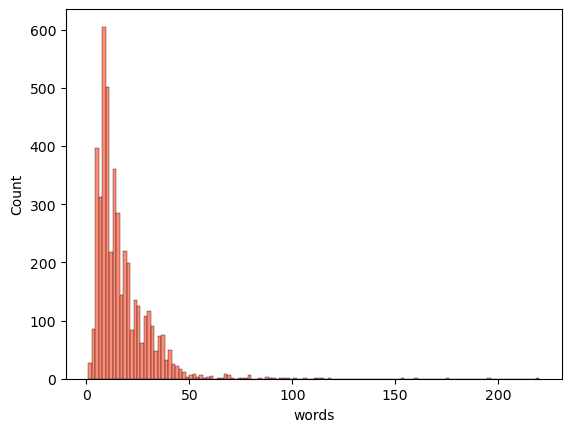

In [21]:
# Extracting the 'ham' texts 
sns.histplot(df[df['label']== 0]['words'], color='tomato');

#### 'spam'

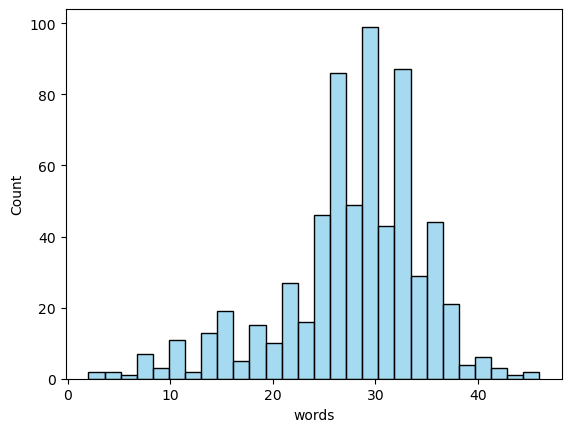

In [22]:
# Extracting the 'spam' texts 
sns.histplot(df[df['label']== 1]['words'], color='skyblue');

# Data Preprocessing 

We are going to do the following: 

1. Replace any non alphabet characters with a space
2. Convert to lower case and split into words
3. Tokenization
4. Remove stop words and punctuation
5. Stemming

In [23]:
corpus = []
stemmer = PorterStemmer()
def preprocess_text(text):
    # Remove text within square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs (starting with 'http://' or 'https://' or 'www.')
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove digits or words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Tokenize text into words
    words = text.split()
    
    # Apply stemming and remove stopwords
    stemmed_words = [stemmer.stem(word) for word in words if word not in STOPWORDS]
    
    return ' '.join(stemmed_words)

In [24]:
input_text = "Hello [world]! Visit https://example.com. <p>This is a test.</p>"
processed_text = preprocess_text(input_text)
print(processed_text)

hello visit test


In [25]:
df['new_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,length,words,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah dont think goe usf live around though


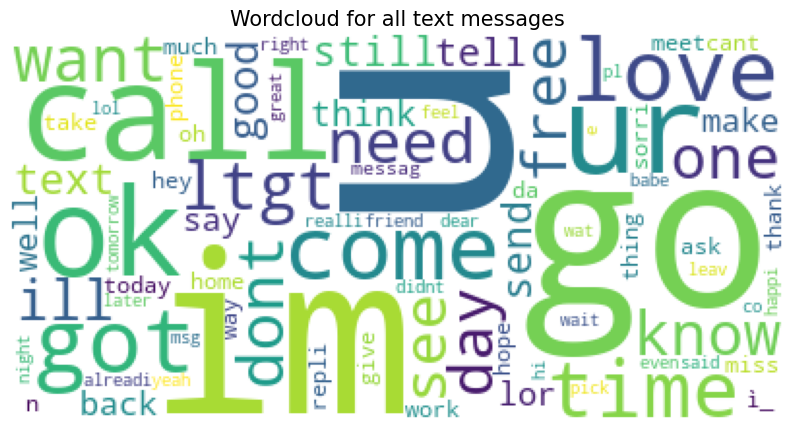

In [26]:
text_01 = " ".join([text_01 for text_01 in df['new_text']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=80)

# Generate and plot wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(text_01))
plt.title('Wordcloud for all text messages', fontsize=15)
plt.axis('off');

In [27]:
spam_text = " ".join([text_01 for text_01 in df[df['label']==1]['new_text']])
spam_text = spam_text.lower().split()

ham_text = " ".join([text_01 for text_01 in df[df['label']==0]['new_text']])
ham_text = ham_text.lower().split()

# Finding words from reviews present in that feedback category only 
spam_text = [x for x in spam_text if x not in ham_text]
spam_text = " ".join(spam_text)

ham_text = [x for x in ham_text if x not in spam_text]
ham_text = " ".join(ham_text)

#### Spam Text

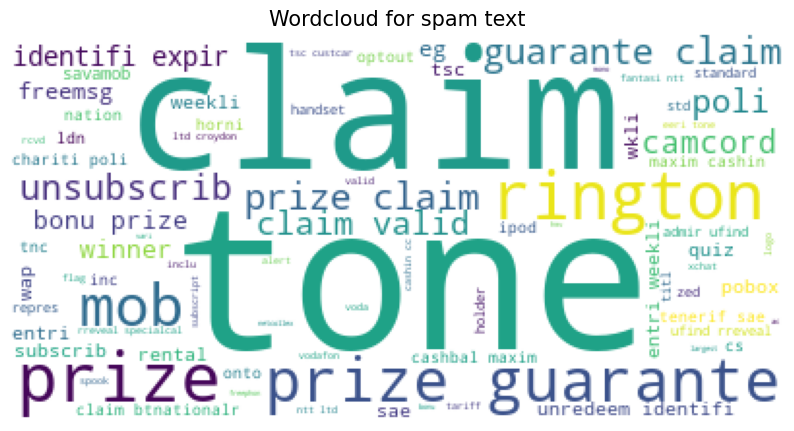

In [28]:
wc = WordCloud(background_color = 'white', max_words=80)

# Generate and plot wordcloud 
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(spam_text))
plt.title('Wordcloud for spam text', fontsize=15)
plt.axis('off');

#### Ham Text

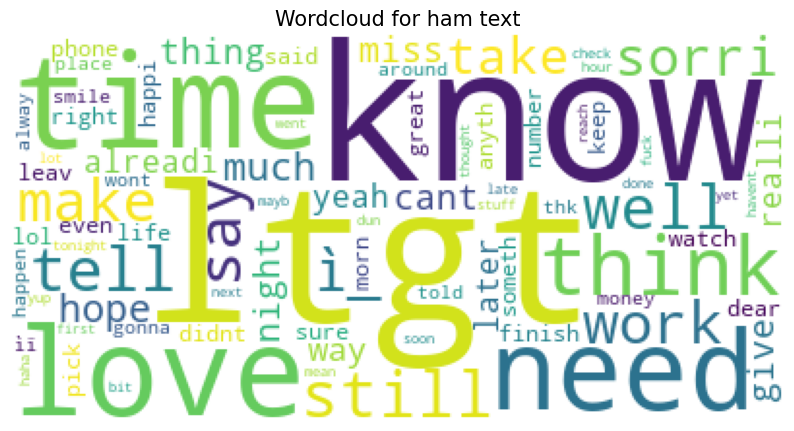

In [29]:
wc = WordCloud(background_color = 'white', max_words=80)

# Generate and plot wordcloud 
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(ham_text))
plt.title('Wordcloud for ham text', fontsize=15)
plt.axis('off');

# Model Building

In [30]:
cv = CountVectorizer()

# Storing independent and dependent variables in X and y 
X = cv.fit_transform(df['new_text']).toarray()
y = df['label'].values

In [31]:
# Splitting the data into train and test sets with 30% data with testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (4135, 6744)
y train: (4135,)
X test: (1034, 6744)
y test: (1034,)


In [32]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### GaussianNB

In [33]:
gnb.fit(X_train, y_train)
y_pred_1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
print(precision_score(y_test, y_pred_1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


#### MultinomialNB

In [34]:
mnb.fit(X_train, y_train)
y_pred_2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))

0.9477756286266924
[[857  39]
 [ 15 123]]
0.7592592592592593


#### BernoulliNB

In [35]:
bnb.fit(X_train, y_train)
y_pred_3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))
print(precision_score(y_test, y_pred_3))

0.9671179883945842
[[889   7]
 [ 27 111]]
0.940677966101695
